# Encargo 2: agrupamiento jerárquico
María José Namuche Bustamante

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wine.csv')

In [3]:
# Análisis de la data
data.shape

(178, 14)

In [4]:
# Datos nulos
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
# Tipo de los datos de cada columna
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [6]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
data = data.drop(['Customer_Segment'], axis = 1)

In [8]:
# Separo la muestra con la que compararé luego de aplicar el algoritmo
indices = [3, 94, 156]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

In [9]:
# Elimino de la data, los valores elegidos para la muestra
data = data.drop(indices, axis = 0)

In [10]:
# Escalo la data y muestra a utilizar
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [11]:
# Variables a evaluar
X = data_escalada

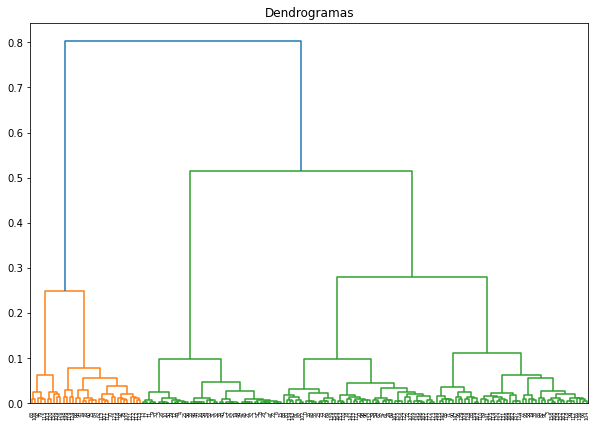

In [12]:
# Dendrograma
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

La línea más larga es la azul y al cruzar una línea horizontal sobre ella se puede tomar el valor  de 2 o 3 para un k óptimo.

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
# Se define el algoritmo con el valor óptimo de K
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward') 

In [17]:
# Entrenamiento del algoritmo
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

In [18]:
# Se verifica en qué clúster se encuentra los datos de muestra
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 1
Muestra 1 se encuentra en el clúster: 2
Muestra 2 se encuentra en el clúster: 0


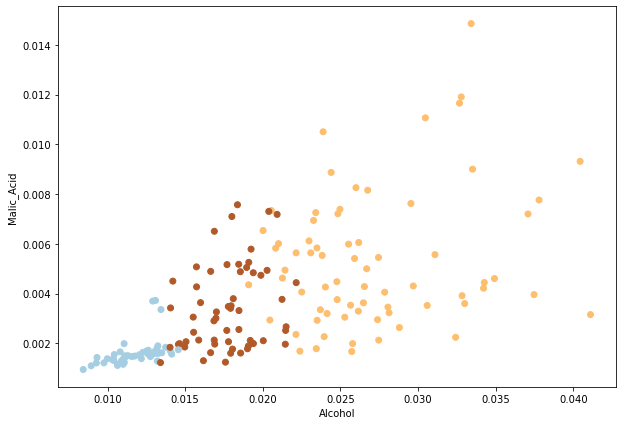

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_,cmap='Paired')
plt.xlabel("Alcohol")
plt.ylabel("Malic_Acid")
plt.show()

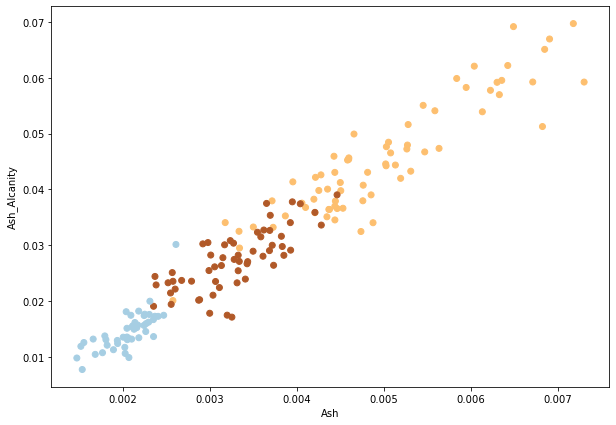

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,2], X[:,3], c=cluster.labels_,cmap='Paired')
plt.xlabel("Ash")
plt.ylabel("Ash_Alcanity")
plt.show()

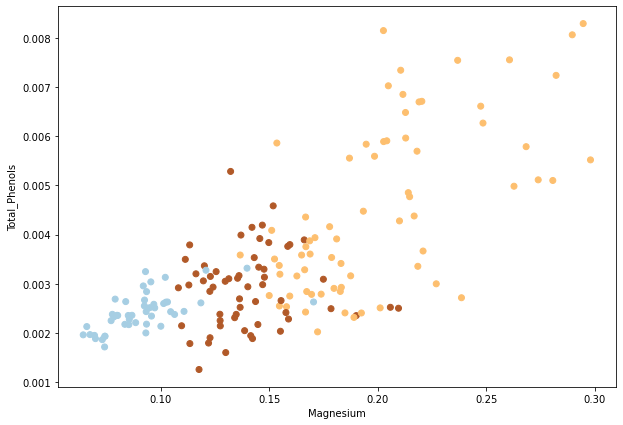

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,4], X[:,5], c=cluster.labels_,cmap='Paired')
plt.xlabel("Magnesium")
plt.ylabel("Total_Phenols")
plt.show()

Se puede apreciar que utilizando el valor óptimo de 3 para k, la distancia interclúster no es la óptima y por ende no será posible predecir con exactitud los valores de 'Customer_Segment'